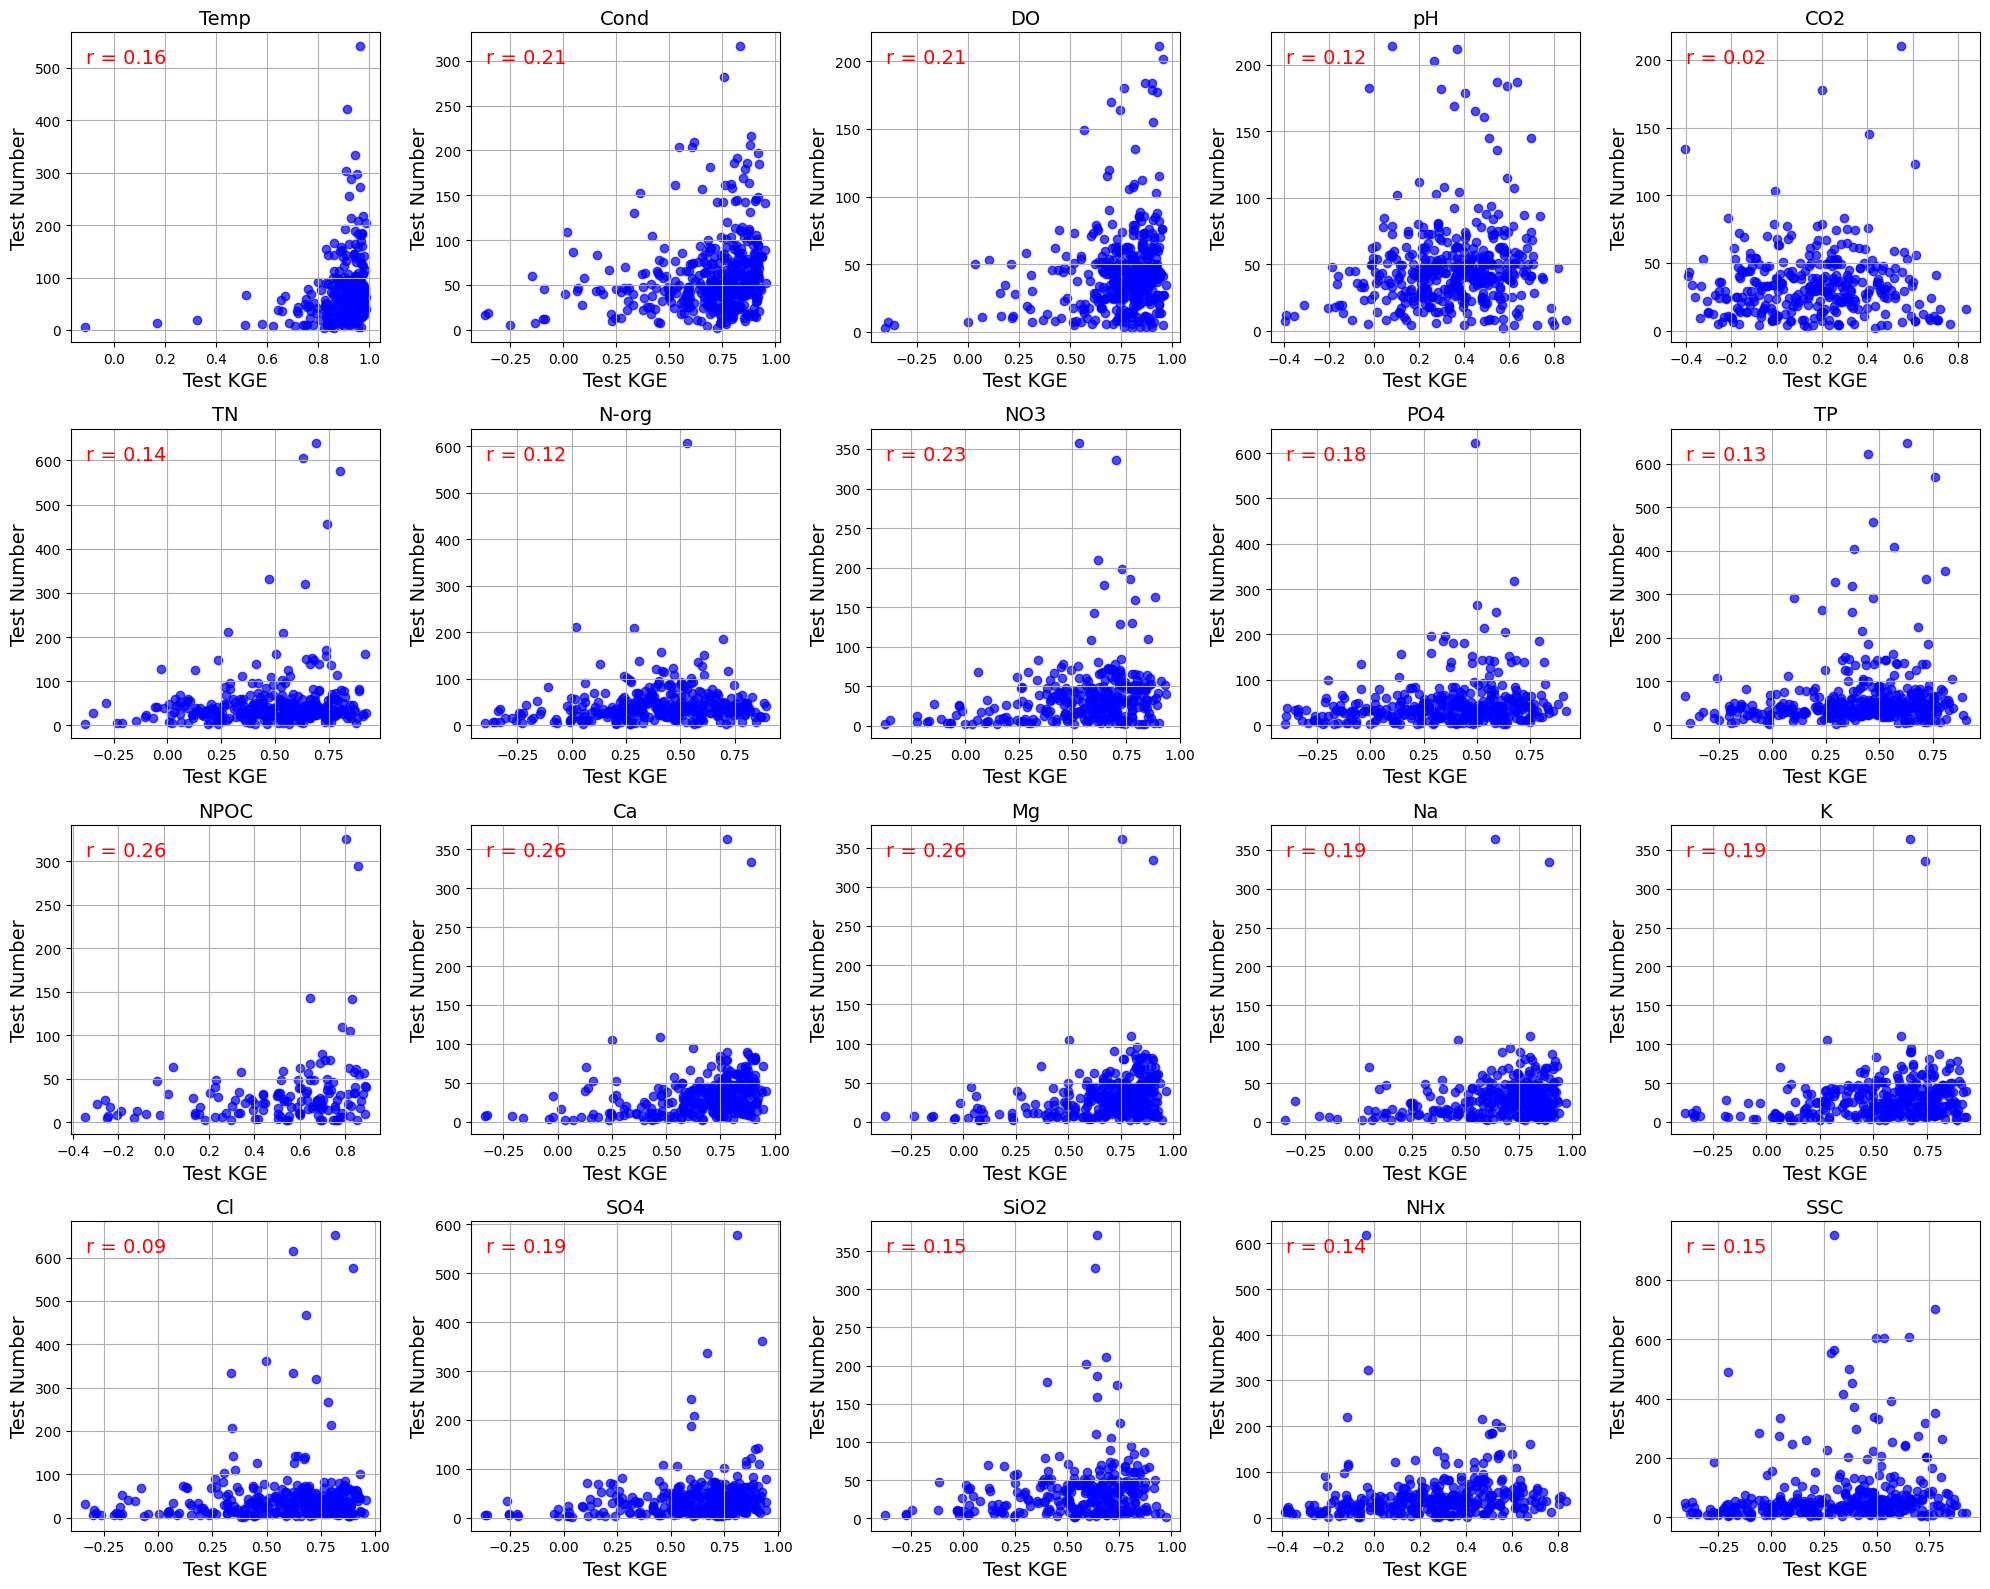

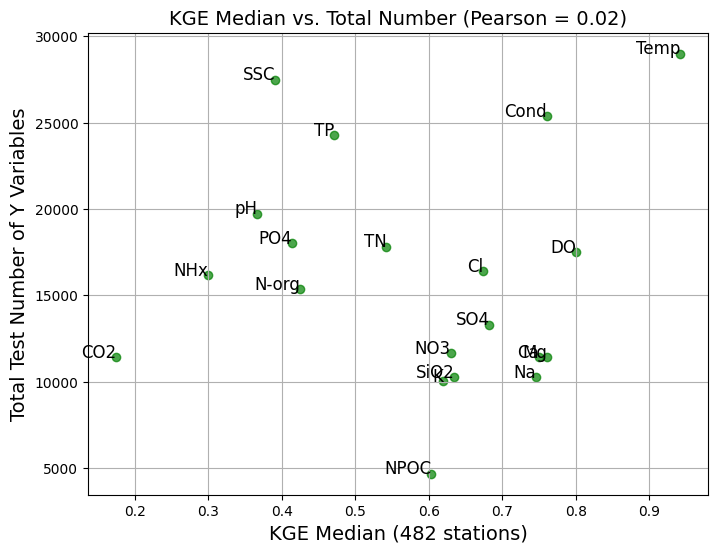

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 读取 CSV 文件
df1 = pd.read_csv("unified_ablation_lstm_logminmax_y/baseline_dropout_0.3/models/lstm/1016_145644/predictions/metric/metrics.csv")
df2 = pd.read_csv("train_num.csv")

# 提取需要的列
cols1 = df1.iloc[:, [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58]]  # Test KGE
cols2 = df2.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]  # Test Numbers
cols3 = df1.iloc[:, -20:]  # Test KGE

# 转换为 numpy 数组并确保数据是浮点数
cols1_array = cols1.to_numpy(dtype=float)  # Test KGE
cols2_array = cols2.to_numpy(dtype=float)  # Test Numbers
cols3_array = cols3.to_numpy(dtype=float)  # Test KGE

# **过滤掉 cols1（Test KGE）中小于 -0.41 的值**
cols1_array = np.where(cols1_array < -0.41, np.nan, cols1_array)

# 变量缩写映射
var_map = {
    '00010': 'Temp', '00095': 'Cond', '00300': 'DO', '00400': 'pH', '00405': 'CO2',
    '00600': 'TN', '00605': 'N-org', '00618': 'NO3', '00660': 'PO4', '00665': 'TP',
    '00681': 'NPOC', '00915': 'Ca', '00925': 'Mg', '00930': 'Na', '00935': 'K',
    '00940': 'Cl', '00945': 'SO4', '00955': 'SiO2', '71846': 'NHx', '80154': 'SSC'
}

# **第一张图：20 个子图，每个 Y 变量绘制 Test KGE vs. Test Number**
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.flatten()

for i in range(20):
    x = cols1_array[:, i]  # Test KGE
    y = cols3_array[:, i]  # Test 数据数量

    # 过滤 NaN 和 Inf 值
    valid_mask = ~np.isnan(x) & ~np.isnan(y) & ~np.isinf(x) & ~np.isinf(y)
    x_valid = x[valid_mask]
    y_valid = y[valid_mask]

    if len(x_valid) < 2 or len(y_valid) < 2:
        print(f"变量 {cols1.columns[i]}: 有效数据点太少，跳过")
        continue

    # 计算 Pearson 相关系数
    try:
        corr, _ = pearsonr(x_valid, y_valid)
    except ValueError as e:
        print(f"无法计算 {cols1.columns[i]}: {e}")
        corr = np.nan  # 如果仍然报错，则用 NaN 替代

    # 获取变量缩写
    col_name = cols1.columns[i]
    short_name = var_map.get(col_name.split("_")[0], col_name)  # 确保映射变量名

    # 绘制子图
    ax = axes[i]
    ax.scatter(x_valid, y_valid, alpha=0.7, color='blue')

    # **修正标题，确保是缩写**
    ax.set_title(f"{short_name}", fontsize=14)
    ax.text(0.05, 0.9, f"r = {corr:.2f}", transform=ax.transAxes, fontsize=14, color="red")

    # 设置轴标签
    ax.set_xlabel("Test KGE", fontsize=14)
    ax.set_ylabel("Test Number", fontsize=14)
    ax.grid(True)

plt.tight_layout()
plt.show()

# **第二张图：KGE Median vs. Total Number of Y Variables**
plt.figure(figsize=(8, 6))

# 计算 X 轴：每个 Y 变量在 482 站点的 KGE median（忽略 NaN）
x_median_kge = np.nanmedian(cols1_array, axis=0)

# 计算 Y 轴：每个 Y 变量的 total number（所有 482 个站点的 `cols2` 训练数据总数）
y_total_number = np.nansum(cols3_array, axis=0)  # **这里用 `nansum()` 计算所有站点的总数**

plt.scatter(x_median_kge, y_total_number, alpha=0.7, color='green')

# 计算 Pearson 相关系数
try:
    corr_median_total, _ = pearsonr(x_median_kge, y_total_number)
except ValueError as e:
    print(f"无法计算 Median KGE vs. Total Number Pearson 相关性: {e}")
    corr_median_total = np.nan

plt.title(f"KGE Median vs. Total Number (Pearson = {corr_median_total:.2f})", fontsize=14)
plt.xlabel("KGE Median (482 stations)", fontsize=14)
plt.ylabel("Total Test Number of Y Variables", fontsize=14)
plt.grid(True)

# **修正点标注，确保直接标出缩写**
for i, (x, y) in enumerate(zip(x_median_kge, y_total_number)):
    short_name = var_map.get(cols1.columns[i].split("_")[0], cols1.columns[i])
    plt.text(x, y, f"{short_name}", fontsize=12, ha='right')

plt.show()


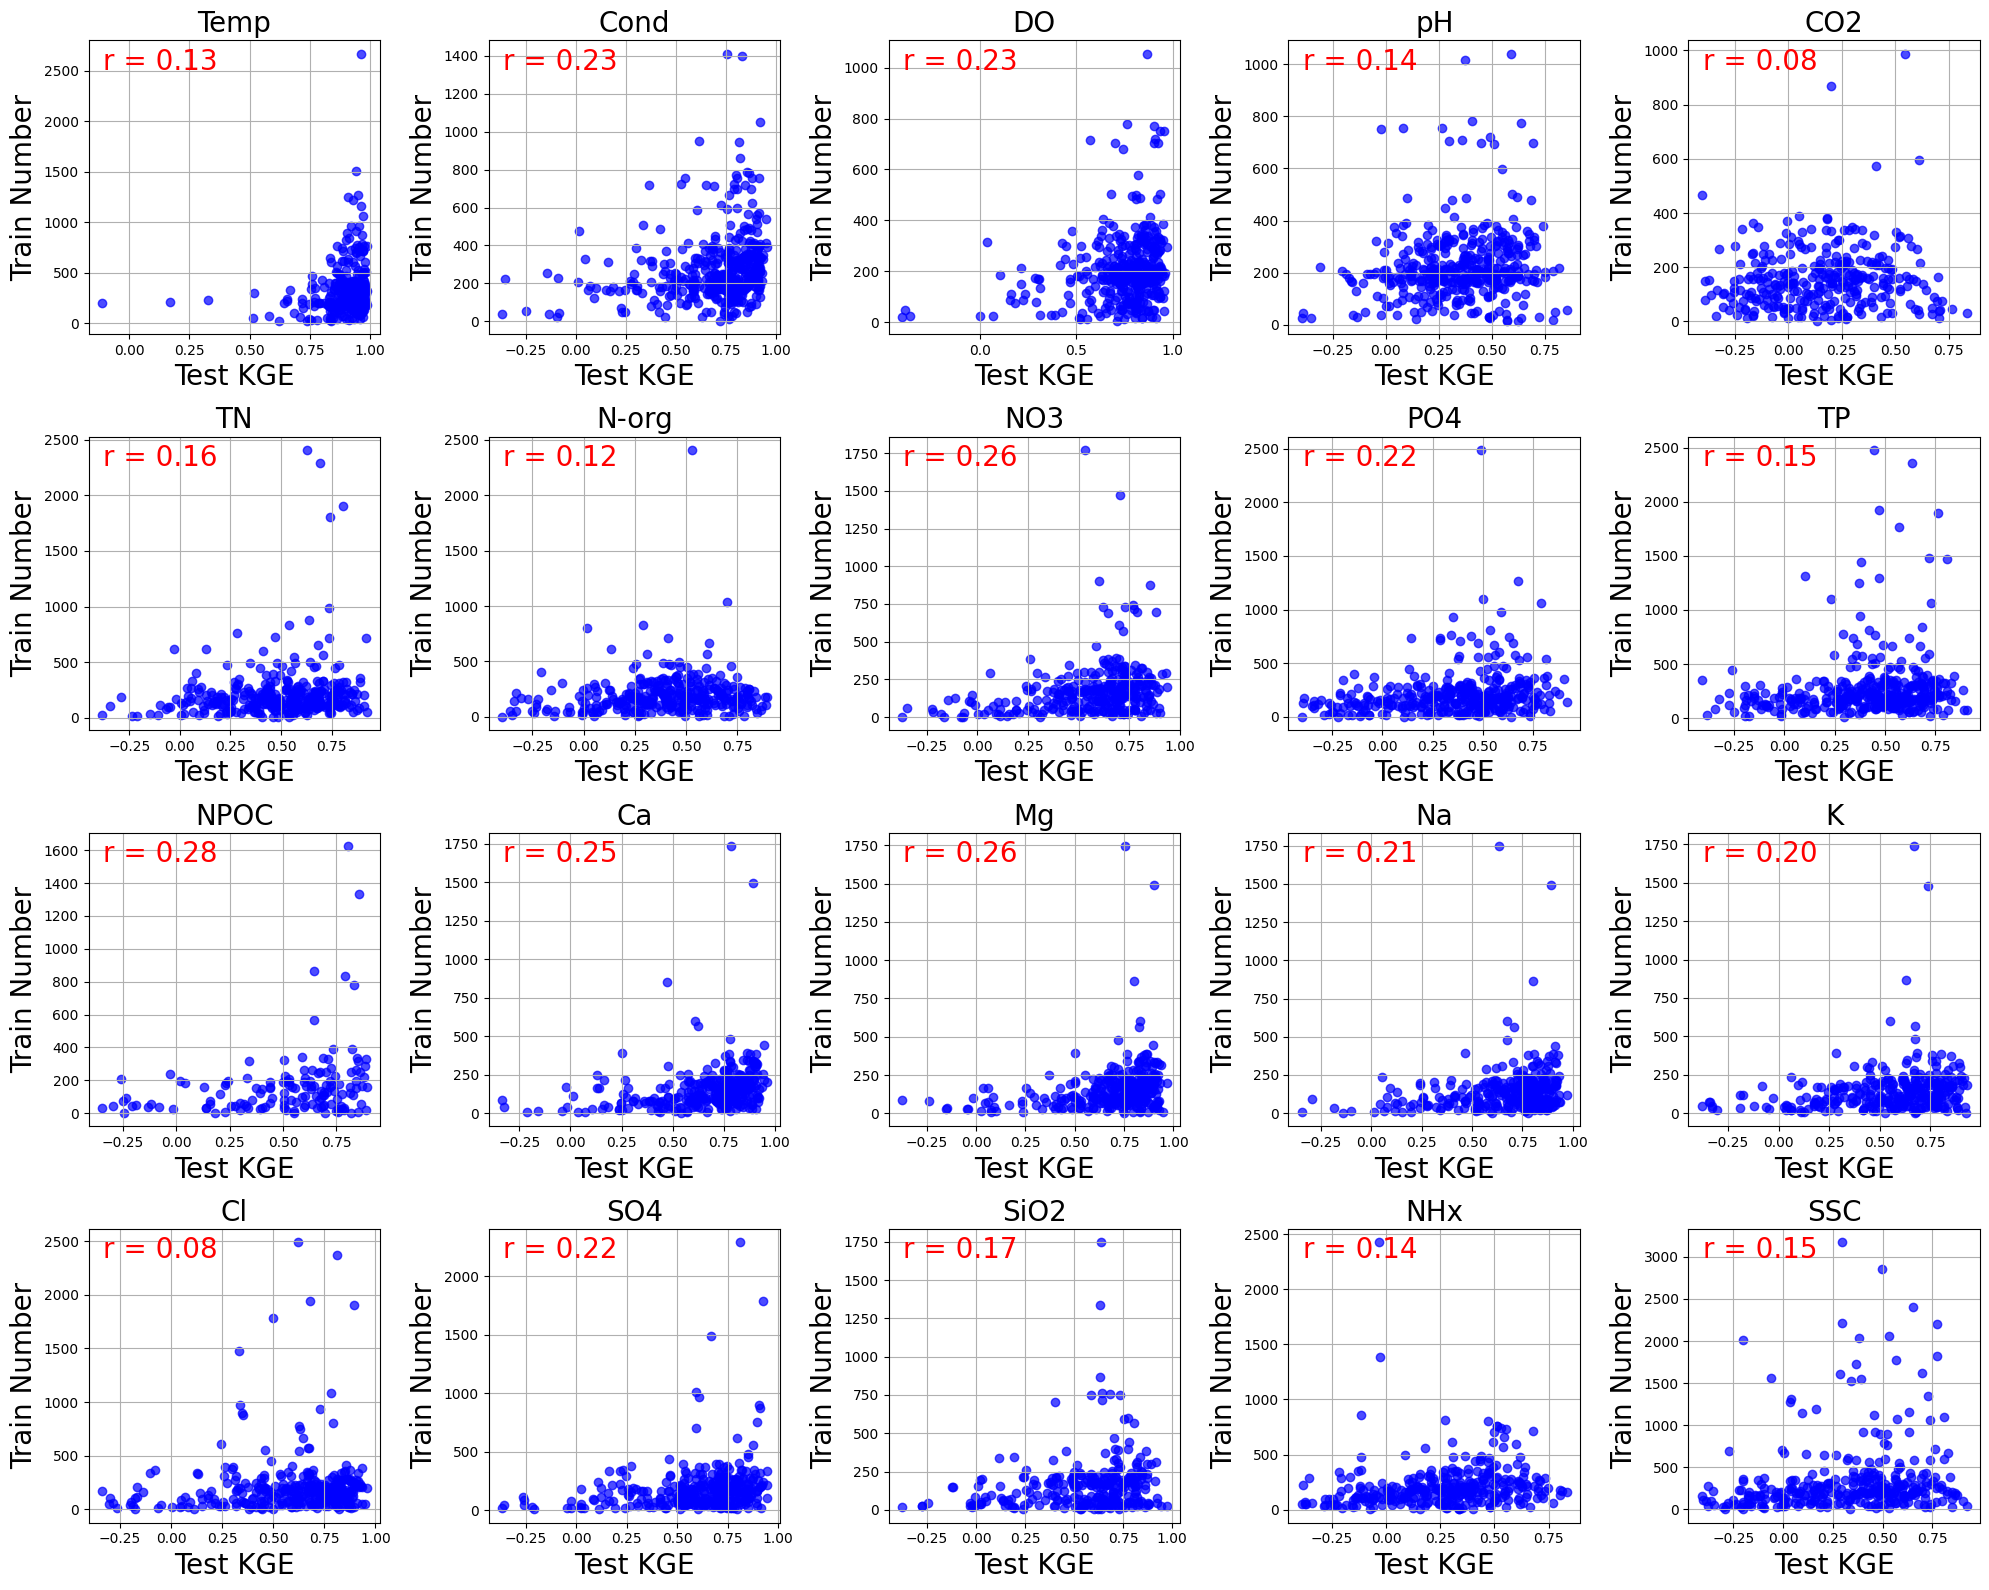

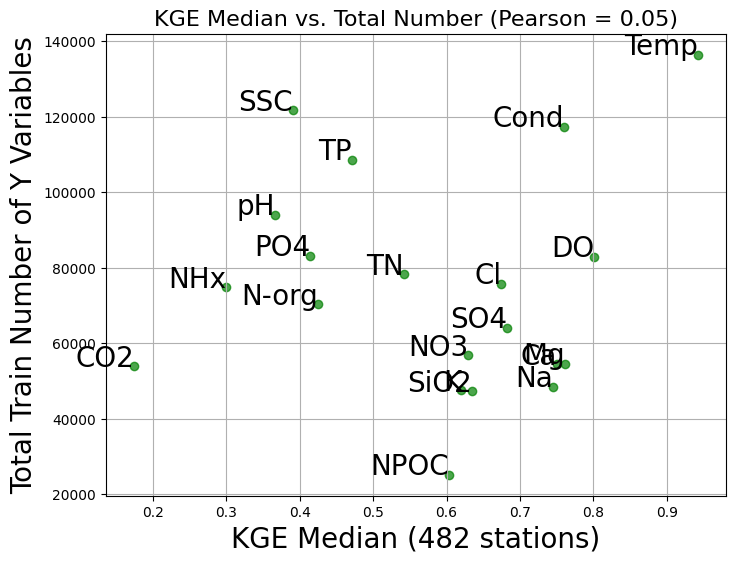

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 读取 CSV 文件
df1 = pd.read_csv("unified_ablation_lstm_logminmax_y/baseline_dropout_0.3/models/lstm/1016_145644/predictions/metric/metrics.csv")
df2 = pd.read_csv("train_num.csv")

# 提取需要的列
cols1 = df1.iloc[:, [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58]]  # Test KGE
cols2 = df2.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]  # Train Numbers
cols3 = df1.iloc[:, -20:]  # Test KGE

# 转换为 numpy 数组并确保数据是浮点数
cols1_array = cols1.to_numpy(dtype=float)  # Test KGE
cols2_array = cols2.to_numpy(dtype=float)  # Test Numbers
cols3_array = cols3.to_numpy(dtype=float)  # Test KGE

# **过滤掉 cols1（Test KGE）中小于 -0.41 的值**
cols1_array = np.where(cols1_array < -0.41, np.nan, cols1_array)

# 变量缩写映射
var_map = {
    '00010': 'Temp', '00095': 'Cond', '00300': 'DO', '00400': 'pH', '00405': 'CO2',
    '00600': 'TN', '00605': 'N-org', '00618': 'NO3', '00660': 'PO4', '00665': 'TP',
    '00681': 'NPOC', '00915': 'Ca', '00925': 'Mg', '00930': 'Na', '00935': 'K',
    '00940': 'Cl', '00945': 'SO4', '00955': 'SiO2', '71846': 'NHx', '80154': 'SSC'
}

# **第一张图：20 个子图，每个 Y 变量绘制 Test KGE vs. Test Number**
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.flatten()

for i in range(20):
    x = cols1_array[:, i]  # Test KGE
    y = cols2_array[:, i]  # Test 数据数量

    # 过滤 NaN 和 Inf 值
    valid_mask = ~np.isnan(x) & ~np.isnan(y) & ~np.isinf(x) & ~np.isinf(y)
    x_valid = x[valid_mask]
    y_valid = y[valid_mask]

    if len(x_valid) < 2 or len(y_valid) < 2:
        print(f"变量 {cols1.columns[i]}: 有效数据点太少，跳过")
        continue

    # 计算 Pearson 相关系数
    try:
        corr, _ = pearsonr(x_valid, y_valid)
    except ValueError as e:
        print(f"无法计算 {cols1.columns[i]}: {e}")
        corr = np.nan  # 如果仍然报错，则用 NaN 替代

    # 获取变量缩写
    col_name = cols1.columns[i]
    short_name = var_map.get(col_name.split("_")[0], col_name)  # 确保映射变量名

    # 绘制子图
    ax = axes[i]
    ax.scatter(x_valid, y_valid, alpha=0.7, color='blue')

    # **修正标题，确保是缩写**
    ax.set_title(f"{short_name}", fontsize=16)
    ax.text(0.05, 0.9, f"r = {corr:.2f}", transform=ax.transAxes, fontsize=16, color="red")

    # 设置轴标签
    ax.set_xlabel("Test KGE", fontsize=16)
    ax.set_ylabel("Train Number", fontsize=16)
    ax.grid(True)

plt.tight_layout()
plt.show()

# **第二张图：KGE Median vs. Total Number of Y Variables**
plt.figure(figsize=(8, 6))

# 计算 X 轴：每个 Y 变量在 482 站点的 KGE median（忽略 NaN）
x_median_kge = np.nanmedian(cols1_array, axis=0)

# 计算 Y 轴：每个 Y 变量的 total number（所有 482 个站点的 `cols2` 训练数据总数）
y_total_number = np.nansum(cols2_array, axis=0)  # **这里用 `nansum()` 计算所有站点的总数**

plt.scatter(x_median_kge, y_total_number, alpha=0.7, color='green')

# 计算 Pearson 相关系数
try:
    corr_median_total, _ = pearsonr(x_median_kge, y_total_number)
except ValueError as e:
    print(f"无法计算 Median KGE vs. Total Number Pearson 相关性: {e}")
    corr_median_total = np.nan

plt.title(f"KGE Median vs. Total Number (Pearson = {corr_median_total:.2f})", fontsize=16)
plt.xlabel("KGE Median (482 stations)", fontsize=16)
plt.ylabel("Total Train Number of Y Variables", fontsize=16)
plt.grid(True)

# **修正点标注，确保直接标出缩写**
for i, (x, y) in enumerate(zip(x_median_kge, y_total_number)):
    short_name = var_map.get(cols1.columns[i].split("_")[0], cols1.columns[i])
    plt.text(x, y, f"{short_name}", fontsize=16, ha='right')

plt.show()


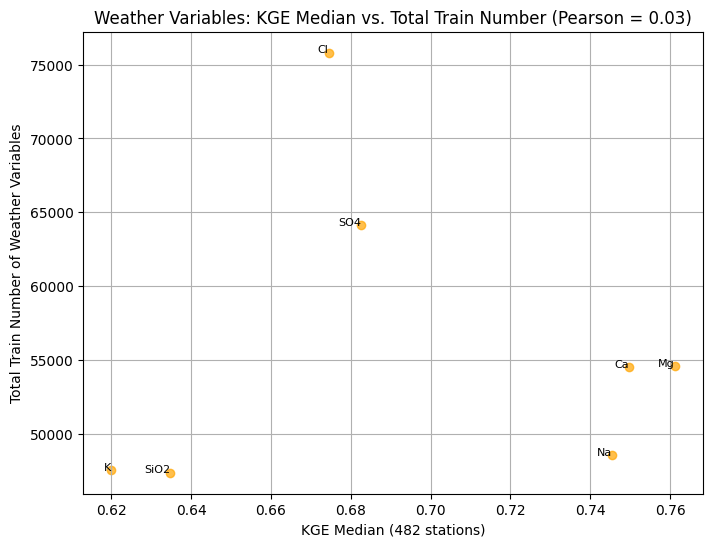

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 读取 CSV 文件
df1 = pd.read_csv("unified_ablation_lstm_logminmax_y/baseline_dropout_0.3/models/lstm/1016_145644/predictions/metric/metrics.csv")
df2 = pd.read_csv("train_num.csv")

# 提取需要的列
cols1 = df1.iloc[:, [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58]]  # Test KGE
cols2 = df2.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]  # Test Numbers

# 转换为 numpy 数组并确保数据是浮点数
cols1_array = cols1.to_numpy(dtype=float)  # Test KGE
cols2_array = cols2.to_numpy(dtype=float)  # Test Numbers

# **过滤掉 cols1（Test KGE）中小于 -0.41 的值**
cols1_array = np.where(cols1_array < -0.41, np.nan, cols1_array)

# 变量缩写映射
var_map = {
    '00010': 'Temp', '00095': 'Cond', '00300': 'DO', '00400': 'pH', '00405': 'CO2',
    '00600': 'TN', '00605': 'N-org', '00618': 'NO3', '00660': 'PO4', '00665': 'TP',
    '00681': 'NPOC', '00915': 'Ca', '00925': 'Mg', '00930': 'Na', '00935': 'K',
    '00940': 'Cl', '00945': 'SO4', '00955': 'SiO2', '71846': 'NHx', '80154': 'SSC'
}

# **Weather 变量**
weather_vars = ['Ca', 'Mg', 'Na', 'K', 'Cl', 'SO4', 'SiO2']

# **确保 Weather 变量正确匹配 cols1.columns**
weather_indices = [i for i, col in enumerate(cols1.columns) if var_map.get(col.split("_")[0]) in weather_vars]

# **计算 X 轴（Weather 变量的 KGE Median）**
x_weather_median_kge = np.nanmedian(cols1_array[:, weather_indices], axis=0)

# **计算 Y 轴（Weather 变量的 Total Train Number）**
y_weather_total_number = np.nansum(cols2_array[:, weather_indices], axis=0)

# **第三张图（Weather 变量）：KGE Median vs. Total Train Number**
plt.figure(figsize=(8, 6))
plt.scatter(x_weather_median_kge, y_weather_total_number, alpha=0.7, color='orange')

# 计算 Pearson 相关系数
try:
    corr_weather, _ = pearsonr(x_weather_median_kge, y_weather_total_number)
except ValueError as e:
    print(f"无法计算 Weather 变量 Pearson 相关性: {e}")
    corr_weather = np.nan

plt.title(f"Weather Variables: KGE Median vs. Total Train Number (Pearson = {corr_weather:.2f})")
plt.xlabel("KGE Median (482 stations)")
plt.ylabel("Total Train Number of Weather Variables")
plt.grid(True)

# **标注 Weather 变量**
for i, (x, y) in enumerate(zip(x_weather_median_kge, y_weather_total_number)):
    plt.text(x, y, f"{weather_vars[i]}", fontsize=8, ha='right')

plt.show()


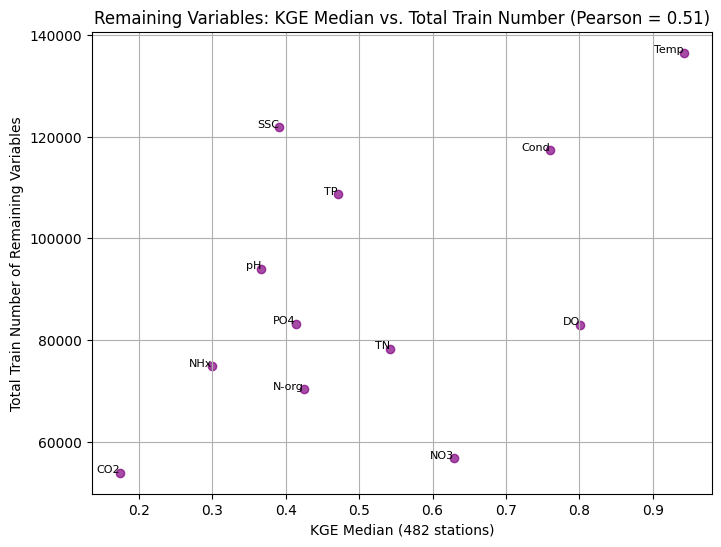

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 读取 CSV 文件
df1 = pd.read_csv("unified_ablation_lstm_logminmax_y/baseline_dropout_0.3/models/lstm/1016_145644/predictions/metric/metrics.csv")
df2 = pd.read_csv("train_num.csv")

# 提取需要的列
cols1 = df1.iloc[:, [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58]]  # Test KGE
cols2 = df2.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]  # Test Numbers

# 转换为 numpy 数组并确保数据是浮点数
cols1_array = cols1.to_numpy(dtype=float)  # Test KGE
cols2_array = cols2.to_numpy(dtype=float)  # Test Numbers

# **过滤掉 cols1（Test KGE）中小于 -0.41 的值**
cols1_array = np.where(cols1_array < -0.41, np.nan, cols1_array)

# 变量缩写映射
var_map = {
    '00010': 'Temp', '00095': 'Cond', '00300': 'DO', '00400': 'pH', '00405': 'CO2',
    '00600': 'TN', '00605': 'N-org', '00618': 'NO3', '00660': 'PO4', '00665': 'TP',
    '00681': 'NPOC', '00915': 'Ca', '00925': 'Mg', '00930': 'Na', '00935': 'K',
    '00940': 'Cl', '00945': 'SO4', '00955': 'SiO2', '71846': 'NHx', '80154': 'SSC'
}

# **Weather 变量**
weather_vars = ['Ca', 'Mg', 'Na', 'K', 'Cl', 'SO4', 'SiO2']
excluded_vars = set(weather_vars + ['NPOC'])  # 去除 Weather 变量和 NPOC

# **筛选剩余变量**
remaining_indices = [i for i, col in enumerate(cols1.columns) if var_map.get(col.split("_")[0]) not in excluded_vars]
remaining_vars = [var_map.get(cols1.columns[i].split("_")[0], cols1.columns[i]) for i in remaining_indices]

# **计算 X 轴（KGE Median，忽略 NaN）**
x_remaining_median_kge = np.nanmedian(cols1_array[:, remaining_indices], axis=0)

# **计算 Y 轴（Total Train Number）**
y_remaining_total_number = np.nansum(cols2_array[:, remaining_indices], axis=0)

# **绘制图**
plt.figure(figsize=(8, 6))
plt.scatter(x_remaining_median_kge, y_remaining_total_number, alpha=0.7, color='purple')

# 计算 Pearson 相关系数
try:
    corr_remaining, _ = pearsonr(x_remaining_median_kge, y_remaining_total_number)
except ValueError as e:
    print(f"无法计算 Pearson 相关性: {e}")
    corr_remaining = np.nan

plt.title(f"Remaining Variables: KGE Median vs. Total Train Number (Pearson = {corr_remaining:.2f})")
plt.xlabel("KGE Median (482 stations)")
plt.ylabel("Total Train Number of Remaining Variables")
plt.grid(True)

# **标注变量**
for i, (x, y) in enumerate(zip(x_remaining_median_kge, y_remaining_total_number)):
    plt.text(x, y, f"{remaining_vars[i]}", fontsize=8, ha='right')

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 读取 CSV 文件为 DataFrame
df1 = pd.read_csv("unified_ablation_lstm_logminmax_y/baseline_dropout_0.3/models/lstm/1016_145644/predictions/metric/metrics.csv")
df2 = pd.read_csv("train_num.csv")

# 提取需要的列
cols1 = df1.iloc[:, [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58]]
cols3 = df1.iloc[:, -20:]

# 转换为 numpy 数组
cols1_array = cols1.to_numpy()
cols3_array = cols3.to_numpy()

# 检查行数一致性
if cols1_array.shape[0] != cols3_array.shape[0]:
    raise ValueError("df1 和 df3 的行数不一致，无法计算相关系数")

# 定义函数：根据箱线图过滤异常值
def filter_low_outliers(data, iqr_multiplier=1.5):
    # 去掉 NaN 值
    clean_data = data[~np.isnan(data)]
    
    # 计算下四分位数和四分位距
    Q1 = np.nanpercentile(clean_data, 25)  # 下四分位数
    IQR = np.nanpercentile(clean_data, 75) - Q1  # 四分位距
    lower_bound = Q1 - iqr_multiplier * IQR
    
    print(f"Lower bound (excluding NaN): {lower_bound}")
    
    # 返回布尔掩码，只保留不低于下界的值
    return data >= lower_bound

def filter_outliers(data, iqr_multiplier=1.5):
    # 去掉 NaN 值
    clean_data = data[~np.isnan(data)]
    
    # 计算下四分位数和上四分位数
    Q1 = np.nanpercentile(clean_data, 25)  # 下四分位数
    Q3 = np.nanpercentile(clean_data, 75)  # 上四分位数
    IQR = Q3 - Q1  # 四分位距

    # 计算上下界
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR

    print(f"Lower bound (excluding NaN): {lower_bound}")
    print(f"Upper bound (excluding NaN): {upper_bound}")
    
    # 返回布尔掩码，过滤掉上下异常值
    # return (data >= lower_bound) & (data <= upper_bound)
    return (data > -0.41)

# 创建一个 4x5 的子图布局
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.flatten()

# 遍历每列并绘制散点图（cols1 vs cols3）
for i in range(20):  # 总共 20 列
    x = cols1_array[:, i]
    y = cols3_array[:, i]

    # 根据箱线图规则过滤异常值
    x_mask = filter_outliers(x)  # 过滤 cols1 的异常值
    y_mask = filter_outliers(y)  # 过滤 cols3 的异常值
    valid_mask = x_mask & y_mask # 同时满足两个条件
    
    # x_valid = x[valid_mask]
    # y_valid = y[valid_mask]
    x_valid = x[x_mask]
    y_valid = y[x_mask]
    # 如果有效数据点太少，跳过该列
    if len(x_valid) < 2:
        print(f"df1 列 {i} 和 df3 列 {i}: 有效数据点太少，跳过")
        continue

    # 计算皮尔逊相关系数
    corr, _ = pearsonr(x_valid, y_valid)

    # 绘制散点图
    ax = axes[i]
    ax.scatter(x_valid, y_valid, alpha=0.7, color='blue')

    # 设置子图标题和相关系数
    col_name1 = cols1.columns[i]  # 从 DataFrame 提取列名
    col_name3 = cols3.columns[i]
    ax.set_title(f"{col_name1} vs {col_name3}", fontsize=10)
    ax.text(0.05, 0.9, f"r = {corr:.2f}", transform=ax.transAxes, fontsize=10, color="red")

    # 设置轴标签
    ax.set_xlabel(f"df1_{col_name1}", fontsize=8)
    ax.set_ylabel(f"df3_{col_name3}", fontsize=8)
    ax.grid(True)

# 调整子图布局
plt.tight_layout()
plt.show()


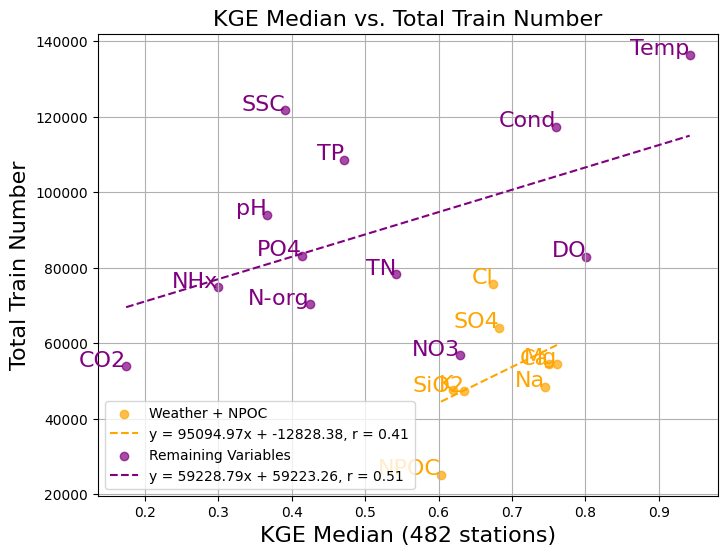

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.optimize import curve_fit

# 读取 CSV 文件
df1 = pd.read_csv("unified_ablation_lstm_logminmax_y/baseline_dropout_0.3/models/lstm/1016_145644/predictions/metric/metrics.csv")
df2 = pd.read_csv("train_num.csv")

# 提取需要的列
cols1 = df1.iloc[:, [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58]]  # Test KGE
cols2 = df2.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]  # Test Numbers

# 转换为 numpy 数组并确保数据是浮点数
cols1_array = cols1.to_numpy(dtype=float)  # Test KGE
cols2_array = cols2.to_numpy(dtype=float)  # Test Numbers

# **过滤掉 cols1（Test KGE）中小于 -0.41 的值**
cols1_array = np.where(cols1_array < -0.41, np.nan, cols1_array)

# 变量缩写映射
var_map = {
    '00010': 'Temp', '00095': 'Cond', '00300': 'DO', '00400': 'pH', '00405': 'CO2',
    '00600': 'TN', '00605': 'N-org', '00618': 'NO3', '00660': 'PO4', '00665': 'TP',
    '00681': 'NPOC', '00915': 'Ca', '00925': 'Mg', '00930': 'Na', '00935': 'K',
    '00940': 'Cl', '00945': 'SO4', '00955': 'SiO2', '71846': 'NHx', '80154': 'SSC'
}

# **Weather 变量**
weather_vars = ['Ca', 'Mg', 'Na', 'K', 'Cl', 'SO4', 'SiO2']
excluded_vars = set(weather_vars + ['NPOC'])  # 去除 Weather 变量和 NPOC

# **筛选 Weather + NPOC 变量**
weather_npoc_indices = [i for i, col in enumerate(cols1.columns) if var_map.get(col.split("_")[0]) in excluded_vars]
weather_npoc_vars = [var_map.get(cols1.columns[i].split("_")[0], cols1.columns[i]) for i in weather_npoc_indices]
x_weather_npoc_median_kge = np.nanmedian(cols1_array[:, weather_npoc_indices], axis=0)
y_weather_npoc_total_number = np.nansum(cols2_array[:, weather_npoc_indices], axis=0)

# **筛选去掉 Weather + NPOC 变量的变量**
remaining_indices = [i for i, col in enumerate(cols1.columns) if var_map.get(col.split("_")[0]) not in excluded_vars]
remaining_vars = [var_map.get(cols1.columns[i].split("_")[0], cols1.columns[i]) for i in remaining_indices]
x_remaining_median_kge = np.nanmedian(cols1_array[:, remaining_indices], axis=0)
y_remaining_total_number = np.nansum(cols2_array[:, remaining_indices], axis=0)

# **定义线性拟合函数**
def linear_fit(x, a, b):
    return a * x + b

# **拟合 Weather + NPOC 变量**
params1, _ = curve_fit(linear_fit, x_weather_npoc_median_kge, y_weather_npoc_total_number)
a1, b1 = params1
x_fit1 = np.linspace(min(x_weather_npoc_median_kge), max(x_weather_npoc_median_kge), 100)
y_fit1 = linear_fit(x_fit1, *params1)

# **拟合剩余变量**
params2, _ = curve_fit(linear_fit, x_remaining_median_kge, y_remaining_total_number)
a2, b2 = params2
x_fit2 = np.linspace(min(x_remaining_median_kge), max(x_remaining_median_kge), 100)
y_fit2 = linear_fit(x_fit2, *params2)

# **计算 Pearson 相关系数**
corr_weather_npoc, _ = pearsonr(x_weather_npoc_median_kge, y_weather_npoc_total_number)
corr_remaining, _ = pearsonr(x_remaining_median_kge, y_remaining_total_number)

# **绘制图**
plt.figure(figsize=(8, 6))

# 画 Weather + NPOC 数据
plt.scatter(x_weather_npoc_median_kge, y_weather_npoc_total_number, alpha=0.7, color='orange', label="Weather + NPOC")
plt.plot(x_fit1, y_fit1, color='orange', linestyle='dashed', label=f"y = {a1:.2f}x + {b1:.2f}, r = {corr_weather_npoc:.2f}")

# 画去掉 Weather + NPOC 的数据
plt.scatter(x_remaining_median_kge, y_remaining_total_number, alpha=0.7, color='purple', label="Remaining Variables")
plt.plot(x_fit2, y_fit2, color='purple', linestyle='dashed', label=f"y = {a2:.2f}x + {b2:.2f}, r = {corr_remaining:.2f}")

# **设置图表**
plt.title("KGE Median vs. Total Train Number", fontsize=16)
plt.xlabel("KGE Median (482 stations)", fontsize=16)
plt.ylabel("Total Train Number", fontsize=16)
plt.legend()
plt.grid(True)

# **标注变量**
for i, (x, y) in enumerate(zip(x_weather_npoc_median_kge, y_weather_npoc_total_number)):
    plt.text(x, y, f"{weather_npoc_vars[i]}", fontsize=16, ha='right', color='orange')

for i, (x, y) in enumerate(zip(x_remaining_median_kge, y_remaining_total_number)):
    plt.text(x, y, f"{remaining_vars[i]}", fontsize=16, ha='right', color='purple')

plt.show()


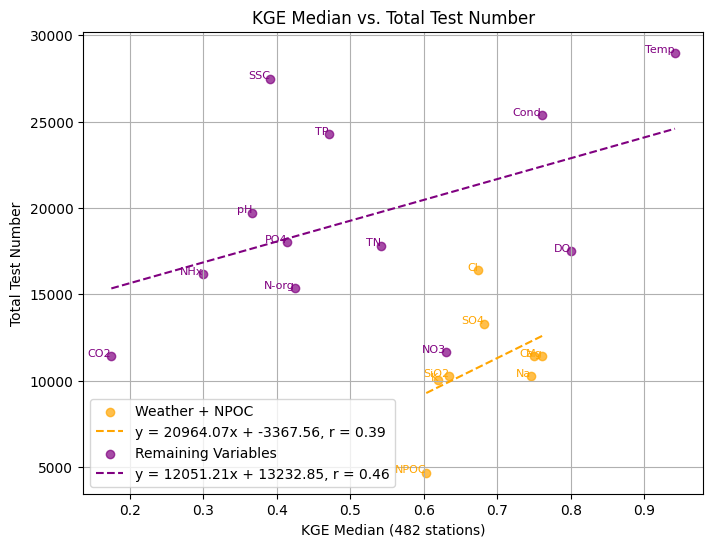

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.optimize import curve_fit

# 读取 CSV 文件
df1 = pd.read_csv("unified_ablation_lstm_logminmax_y/baseline_dropout_0.3/models/lstm/1016_145644/predictions/metric/metrics.csv")
df2 = pd.read_csv("train_num.csv")

# 提取需要的列
cols1 = df1.iloc[:, [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58]]  # Test KGE
cols2 = df1.iloc[:, -20:]  # Test KGE

# 转换为 numpy 数组并确保数据是浮点数
cols1_array = cols1.to_numpy(dtype=float)  # Test KGE
cols2_array = cols2.to_numpy(dtype=float)  # Test Numbers

# **过滤掉 cols1（Test KGE）中小于 -0.41 的值**
cols1_array = np.where(cols1_array < -0.41, np.nan, cols1_array)

# 变量缩写映射
var_map = {
    '00010': 'Temp', '00095': 'Cond', '00300': 'DO', '00400': 'pH', '00405': 'CO2',
    '00600': 'TN', '00605': 'N-org', '00618': 'NO3', '00660': 'PO4', '00665': 'TP',
    '00681': 'NPOC', '00915': 'Ca', '00925': 'Mg', '00930': 'Na', '00935': 'K',
    '00940': 'Cl', '00945': 'SO4', '00955': 'SiO2', '71846': 'NHx', '80154': 'SSC'
}

# **Weather 变量**
weather_vars = ['Ca', 'Mg', 'Na', 'K', 'Cl', 'SO4', 'SiO2']
excluded_vars = set(weather_vars + ['NPOC'])  # 去除 Weather 变量和 NPOC

# **筛选 Weather + NPOC 变量**
weather_npoc_indices = [i for i, col in enumerate(cols1.columns) if var_map.get(col.split("_")[0]) in excluded_vars]
weather_npoc_vars = [var_map.get(cols1.columns[i].split("_")[0], cols1.columns[i]) for i in weather_npoc_indices]
x_weather_npoc_median_kge = np.nanmedian(cols1_array[:, weather_npoc_indices], axis=0)
y_weather_npoc_total_number = np.nansum(cols2_array[:, weather_npoc_indices], axis=0)

# **筛选去掉 Weather + NPOC 变量的变量**
remaining_indices = [i for i, col in enumerate(cols1.columns) if var_map.get(col.split("_")[0]) not in excluded_vars]
remaining_vars = [var_map.get(cols1.columns[i].split("_")[0], cols1.columns[i]) for i in remaining_indices]
x_remaining_median_kge = np.nanmedian(cols1_array[:, remaining_indices], axis=0)
y_remaining_total_number = np.nansum(cols2_array[:, remaining_indices], axis=0)

# **定义线性拟合函数**
def linear_fit(x, a, b):
    return a * x + b

# **拟合 Weather + NPOC 变量**
params1, _ = curve_fit(linear_fit, x_weather_npoc_median_kge, y_weather_npoc_total_number)
a1, b1 = params1
x_fit1 = np.linspace(min(x_weather_npoc_median_kge), max(x_weather_npoc_median_kge), 100)
y_fit1 = linear_fit(x_fit1, *params1)

# **拟合剩余变量**
params2, _ = curve_fit(linear_fit, x_remaining_median_kge, y_remaining_total_number)
a2, b2 = params2
x_fit2 = np.linspace(min(x_remaining_median_kge), max(x_remaining_median_kge), 100)
y_fit2 = linear_fit(x_fit2, *params2)

# **计算 Pearson 相关系数**
corr_weather_npoc, _ = pearsonr(x_weather_npoc_median_kge, y_weather_npoc_total_number)
corr_remaining, _ = pearsonr(x_remaining_median_kge, y_remaining_total_number)

# **绘制图**
plt.figure(figsize=(8, 6))

# 画 Weather + NPOC 数据
plt.scatter(x_weather_npoc_median_kge, y_weather_npoc_total_number, alpha=0.7, color='orange', label="Weather + NPOC")
plt.plot(x_fit1, y_fit1, color='orange', linestyle='dashed', label=f"y = {a1:.2f}x + {b1:.2f}, r = {corr_weather_npoc:.2f}")

# 画去掉 Weather + NPOC 的数据
plt.scatter(x_remaining_median_kge, y_remaining_total_number, alpha=0.7, color='purple', label="Remaining Variables")
plt.plot(x_fit2, y_fit2, color='purple', linestyle='dashed', label=f"y = {a2:.2f}x + {b2:.2f}, r = {corr_remaining:.2f}")

# **设置图表**
plt.title("KGE Median vs. Total Test Number")
plt.xlabel("KGE Median (482 stations)")
plt.ylabel("Total Test Number")
plt.legend()
plt.grid(True)

# **标注变量**
for i, (x, y) in enumerate(zip(x_weather_npoc_median_kge, y_weather_npoc_total_number)):
    plt.text(x, y, f"{weather_npoc_vars[i]}", fontsize=8, ha='right', color='orange')

for i, (x, y) in enumerate(zip(x_remaining_median_kge, y_remaining_total_number)):
    plt.text(x, y, f"{remaining_vars[i]}", fontsize=8, ha='right', color='purple')

plt.show()
